In [1]:
import cv2
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
df = pd.read_csv("test_bboxes.csv")

In [3]:
def get_candidate_row_from_df(cls):
    """
    Gets the patch from the image of a given class.
    """
    recs = df.groupby('class')
    recs = recs.filter(lambda t: t['class'].tolist()[0] == cls)
    list_of_candidate_rows = []
    for i, row in recs.iterrows():
        width = row['x2'] - row['x1']
        height = row['y2'] - row['y1']
        if width < 50 or height < 50: continue
        list_of_candidate_rows.append(row)
    candidate = random.choice(list_of_candidate_rows)
    return candidate

In [17]:
cls = "Haemorrhages"

In [18]:
def get_patch_from_image(cls):
    path, _, x1, y1, x2, y2, height, width = get_candidate_row_from_df(cls)
    img = cv2.imread(path)
    patch = img[y1: y2, x1: x2]
    return patch

In [30]:
patch = get_patch_from_image(cls)

In [31]:
patch.shape

(50, 56, 3)

In [32]:
img = cv2.imread('imgs/normal_fundus.jpg')
img.shape

(746, 1000, 3)

In [33]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
patch = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)

In [14]:
def plot_two_imgs_side_by_side(img1, img2):
    """
    Horizontally plot two images side by side for better viewing.
    """    
    f, axarr = plt.subplots(1,2, figsize=(15,11))
    axarr[0].imshow(img1)
    axarr[1].imshow(img2)
    plt.show()

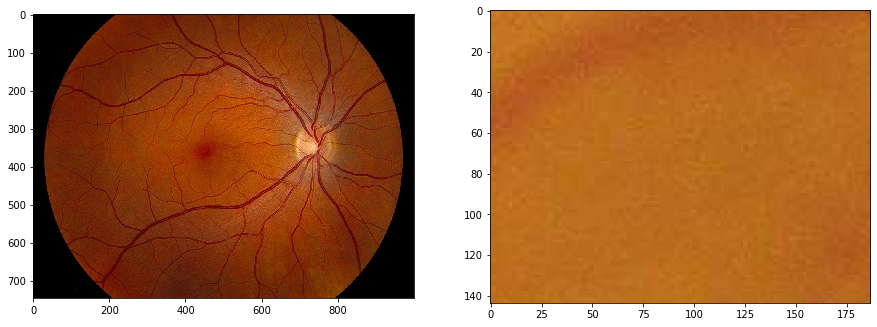

In [23]:
plot_two_imgs_side_by_side(img, patch)

In [45]:
def apply_patch_on_the_image(img, patch, offset=150):
    x_offset = y_offset = offset
    img[y_offset:y_offset+patch.shape[0], x_offset:x_offset+patch.shape[1]] = patch
    mask = np.zeros(shape=img.shape)
    mask[y_offset:y_offset+patch.shape[0], x_offset:x_offset+patch.shape[1]] = 1
    bounding_box = (y_offset, patch.shape[0], x_offset, patch.shape[1])
    return img, mask, bounding_box

(150, 50, 150, 56)


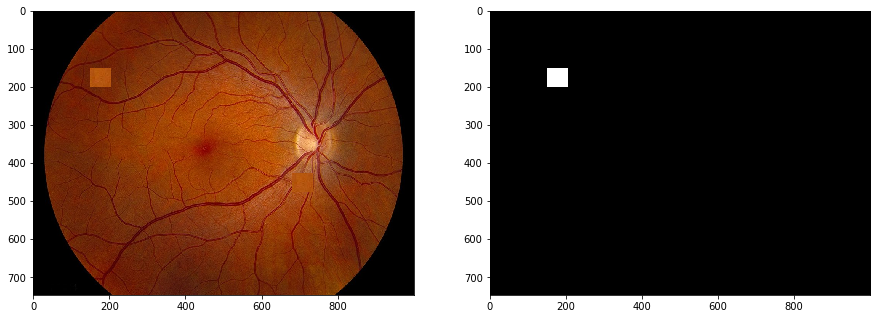

In [46]:
img, mask, bbox = apply_patch_on_the_image(img, patch)
print(bbox)
plot_two_imgs_side_by_side(img, mask)